In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw,ImageFont
import numpy as np

import warnings
warnings.filterwarnings('ignore')

image_dir = "data/pics"

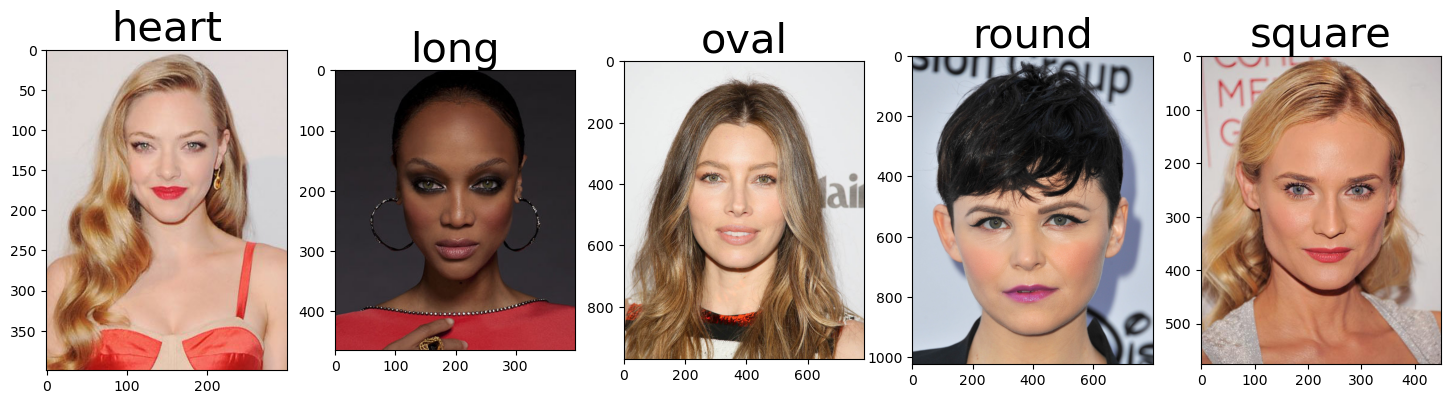

In [2]:
plt.figure(figsize = (18,18))

examples = ['data/pics/heart/amanda seyfried 10.jpg',
            'data/pics/long/Tyra Banks (4).jpg',
            'data/pics/oval/Jessica Biel (20).jpg',
            'data/pics/round/Ginnifer Goodwin (35).jpg',
            'data/pics/square/Diane Kruger (1).jpg']

names = ['heart','long','oval','round','square']
            
for i in range(0,len(examples)):
    plt.subplot(2,5,i+1)
    img = Image.open(examples[i])
    draw = ImageDraw.Draw(img)
    plt.imshow(img)
    plt.title(names[i],fontsize= 30)
    img.close()

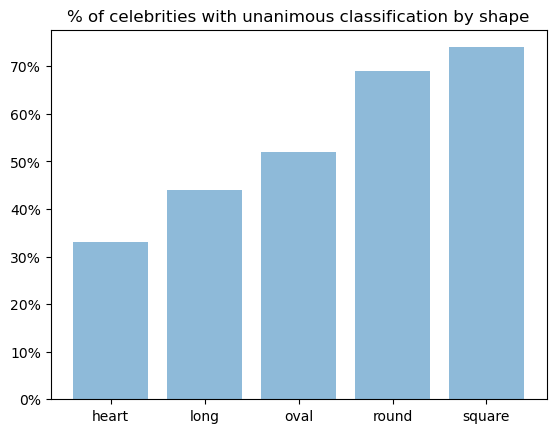

In [4]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.yaxis.set_major_formatter(formatter)


percent_unanim = [33,44,52,69,74]
shapes = ['heart','long','oval','round','square']
y_pos = np.arange(len(shapes))

plt.bar(y_pos, percent_unanim, align='center', alpha=0.5)
plt.xticks(y_pos, shapes)
plt.title('% of celebrities with unanimous classification by shape')
 
plt.show()

# Processing Images

### Feature Extraction

In [6]:
df = pd.DataFrame(columns = ['0','1','2','3','4','5','6','7','8','9','10','11',	'12',	'13',	'14',	'15',	'16','17',
                             '18',	'19',	'20',	'21',	'22',	'23',	'24','25',	'26',	'27',	'28',	'29',
                             '30',	'31',	'32',	'33',	'34',	'35',	'36',	'37',	'38',	'39',	'40',	'41',
                             '42',	'43',	'44',	'45',	'46',	'47',	'48',	'49',	'50',	'51',	'52',	'53',
                             '54',	'55',	'56',	'57',	'58',	'59',	'60',	'61',	'62',	'63',	'64',	'65',
                             '66',	'67',	'68',	'69',	'70',	'71',	'72',	'73',	'74',	'75',	'76',	'77',
                             '78',	'79',	'80',	'81',	'82',	'83',	'84',	'85',	'86',	'87',	'88',	'89',
                             '90',	'91',	'92',	'93',	'94',	'95',	'96',	'97',	'98',	'99',	'100',	'101',
                             '102',	'103',	'104',	'105',	'106',	'107',	'108',	'109',	'110',	'111',	'112',	'113',
                             '114',	'115',	'116',	'117',	'118',	'119',	'120',	'121',	'122',	'123',	'124',	'125',
                             '126',	'127',	'128',	'129',	'130',	'131',	'132',	'133',	'134',	'135',	'136',	'137',
                             '138',	'139',	'140',	'141',	'142',	'143','A1','A2','A3','A4','A5','A6','A7','A8','A9',
                            'A10','A11','A12','A13','A14','A15','A16','Width','Height','H_W_Ratio','Jaw_width','J_F_Ratio',
                             'MJ_width','MJ_J_width'])

In [7]:
%run -i functions_only.py    # This calls my main functions (make_face_df, Distance, ScaleRotateTranslate)

<Figure size 640x480 with 0 Axes>

In [8]:
%run -i functions_only_save.py    # This calls my 2nd function for Recommendation Purpose

In [9]:
# load data file
# start here
data = pd.read_csv('all_features.csv',index_col = None)
data = data.drop('Unnamed: 0',axis = 1)
data.shape

(1524, 170)

# Data Visualizations

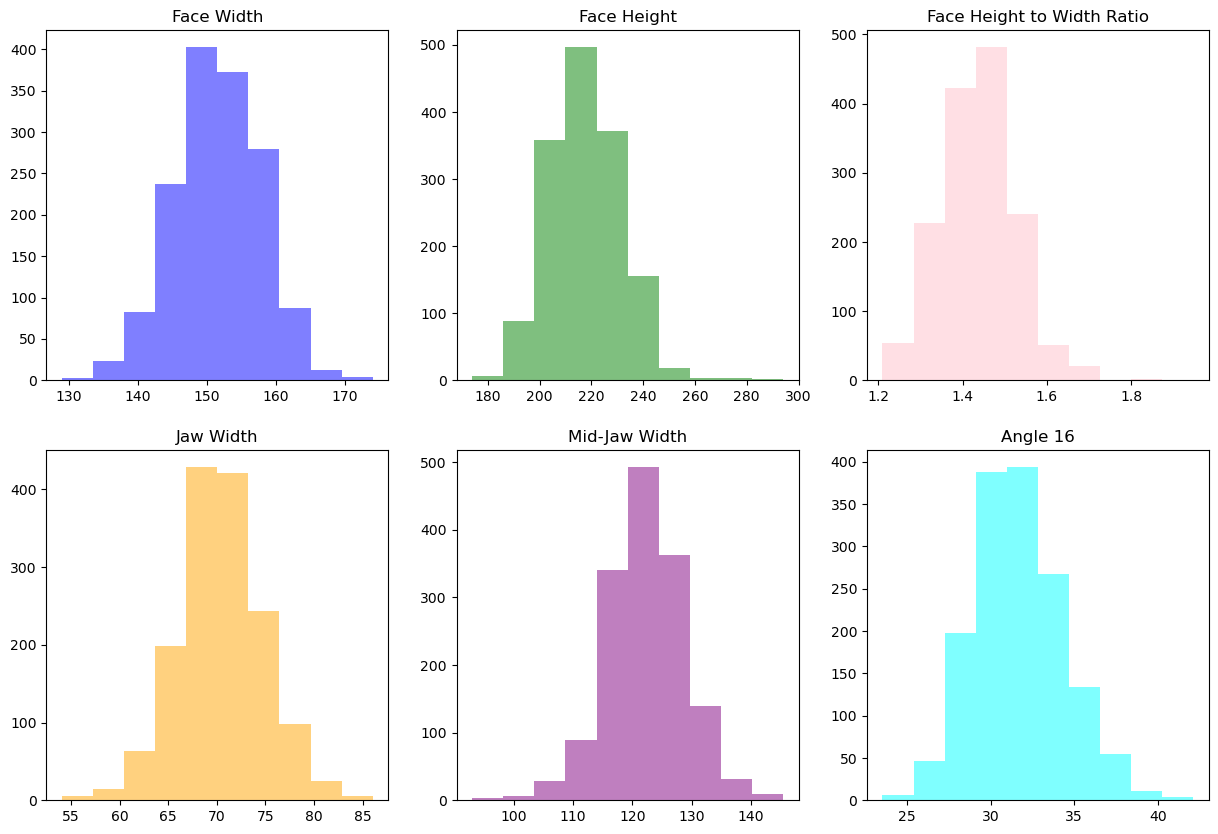

In [10]:
xclean = data.dropna(axis=0, how='any')
plt.figure(figsize=(15,10)) 

plt.subplot(2,3,1)
plt.hist(xclean['Width'], 10, facecolor='blue', alpha=0.5)
plt.title('Face Width')

plt.subplot(2,3,2)
plt.hist(xclean['Height'], 10, facecolor='green', alpha=0.5)
plt.title('Face Height')

plt.subplot(2,3,3)
plt.hist(xclean['H_W_Ratio'], 10, facecolor='pink', alpha=0.5)
plt.title('Face Height to Width Ratio')

plt.subplot(2,3,4)
plt.hist(xclean['Jaw_width'], 10, facecolor='orange', alpha=0.5)
plt.title('Jaw Width')

plt.subplot(2,3,5)
plt.hist(xclean['MJ_width'], 10, facecolor='purple', alpha=0.5)
plt.title('Mid-Jaw Width')

plt.subplot(2,3,6)
plt.hist(xclean['A16'], 10, facecolor='aqua', alpha=0.5)
plt.title('Angle 16')

plt.show()

The attributes here appear to be normally distributed. Now I want to look at the distribution by face shape and what may make them different.

In [11]:
from scipy import stats

S1 = []
S2 = []
S1S2 = []
p_value = []
t_tests = pd.DataFrame() 
labels = ['heart','long','oval','round','square']
for i in range(0,4):
    for j in range(0,4):
        t = (stats.ttest_ind(xclean[xclean.classified_shape == labels[i] ].Width, xclean[xclean.classified_shape == labels[j+1]].Width))
        p_value.append(t.pvalue)
        S1.append(labels[i])
        S2.append(labels[j+1])   
t_tests['S1'] = S1
t_tests['S2'] = S2
t_tests["test"] = t_tests["S1"].map(str) + ':' + t_tests["S2"]
t_tests['p_value'] = p_value

t_tests = t_tests[t_tests.S1 != t_tests.S2]

In [12]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'green' if val < 0.05 else 'black'
    return 'color: %s' % color

s = t_tests.style.applymap(color_negative_red,subset=pd.IndexSlice[:, ['p_value']])
s

,S1,S2,test,p_value
0,heart,long,heart:long,0.000710
1,heart,oval,heart:oval,0.318952
2,heart,round,heart:round,0.000001
3,heart,square,heart:square,0.316319
5,long,oval,long:oval,0.000009
6,long,round,long:round,0.000000
7,long,square,long:square,0.017976
8,oval,long,oval:long,0.000009
10,oval,round,oval:round,0.000039
11,oval,square,oval:square,0.039463


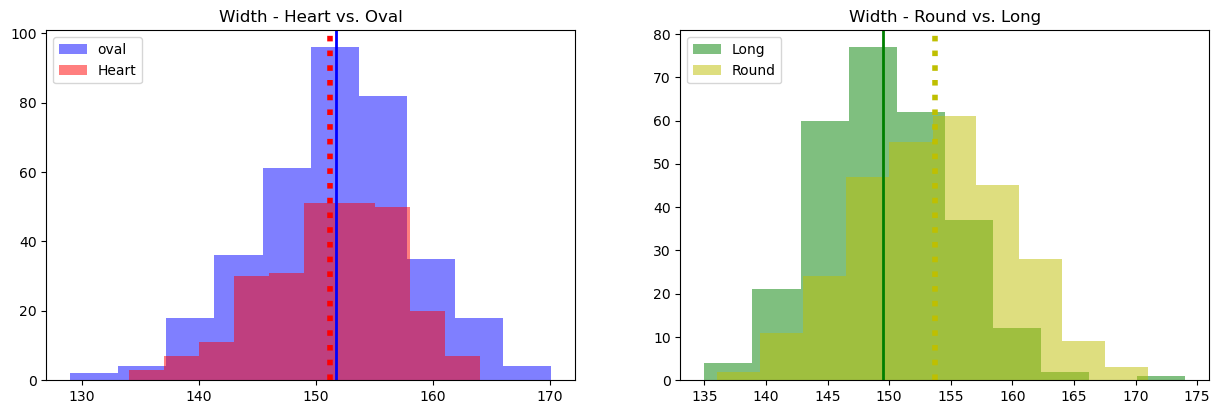

In [13]:

# Face width histograms; purposely normed because of varying sample sizes.

HW = xclean[xclean['classified_shape']=="heart"] 
OW = xclean[xclean['classified_shape']=="oval"] 
LW = xclean[xclean['classified_shape']=="long"] 
RW = xclean[xclean['classified_shape']=="round"] 

plt.figure(figsize=(15,10)) 

plt.subplot(2,2,1)
plt.hist(OW['Width'],label = 'oval',alpha = 0.5, color = 'b')
plt.hist(HW['Width'],label = 'Heart',alpha = 0.5, color = 'r')
plt.axvline(OW['Width'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(HW['Width'].mean(), color='r', linestyle='dotted', linewidth=4)
plt.title('Width - Heart vs. Oval')
plt.legend(loc='upper left')

plt.subplot(2,2,2)
plt.hist(LW['Width'],label = 'Long',alpha = 0.5, color = 'g')
plt.hist(RW['Width'],label = 'Round',alpha = 0.5, color = 'y')
plt.axvline(LW['Width'].mean(), color='g', linestyle='solid', linewidth=2)
plt.axvline(RW['Width'].mean(), color='y', linestyle='dotted', linewidth=4)
plt.legend(loc='upper left')
plt.title('Width - Round vs. Long')

plt.show()

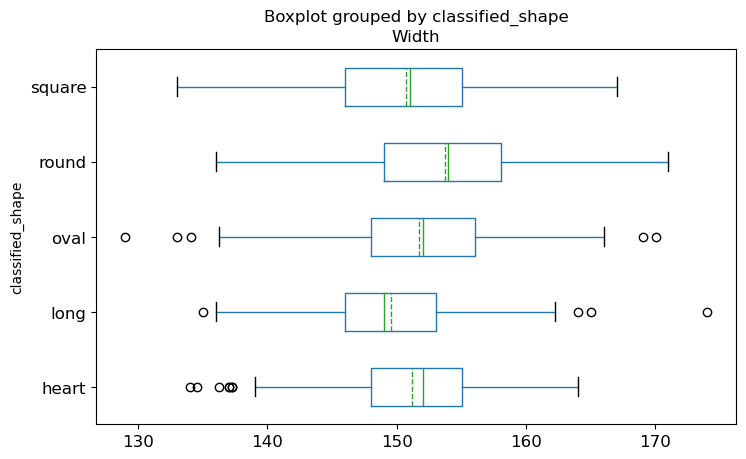

In [14]:
data.boxplot(column='Width', by='classified_shape',vert=False, ax=None, fontsize=12, rot=0, grid=False, figsize=(8,5), 
             meanline = True, showmeans = True,
                  layout=None, return_type=None)
plt.show()

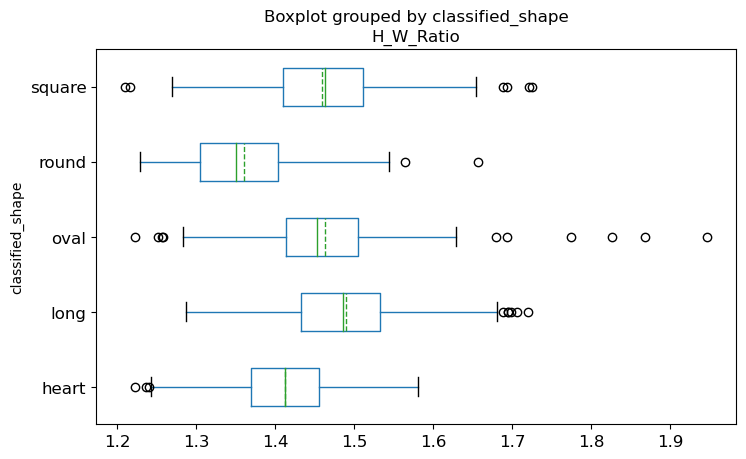

In [15]:
# H_W_Ratio

data.boxplot(column='H_W_Ratio', by='classified_shape',vert=False, ax=None, fontsize=12, rot=0, grid=False, figsize=(8,5), 
                  layout=None, return_type=None, meanline = True, showmeans = True)
plt.show()

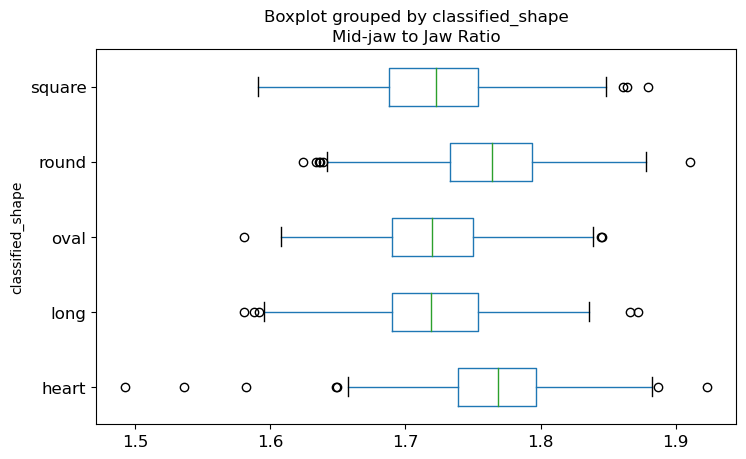

In [16]:
data.boxplot(column='MJ_J_width', by='classified_shape',vert=False, ax=None, fontsize=12, rot=0, grid=False, figsize=(8,5), 
                  layout=None, return_type=None)
plt.title('Mid-jaw to Jaw Ratio')
plt.show()

## Face Overlays

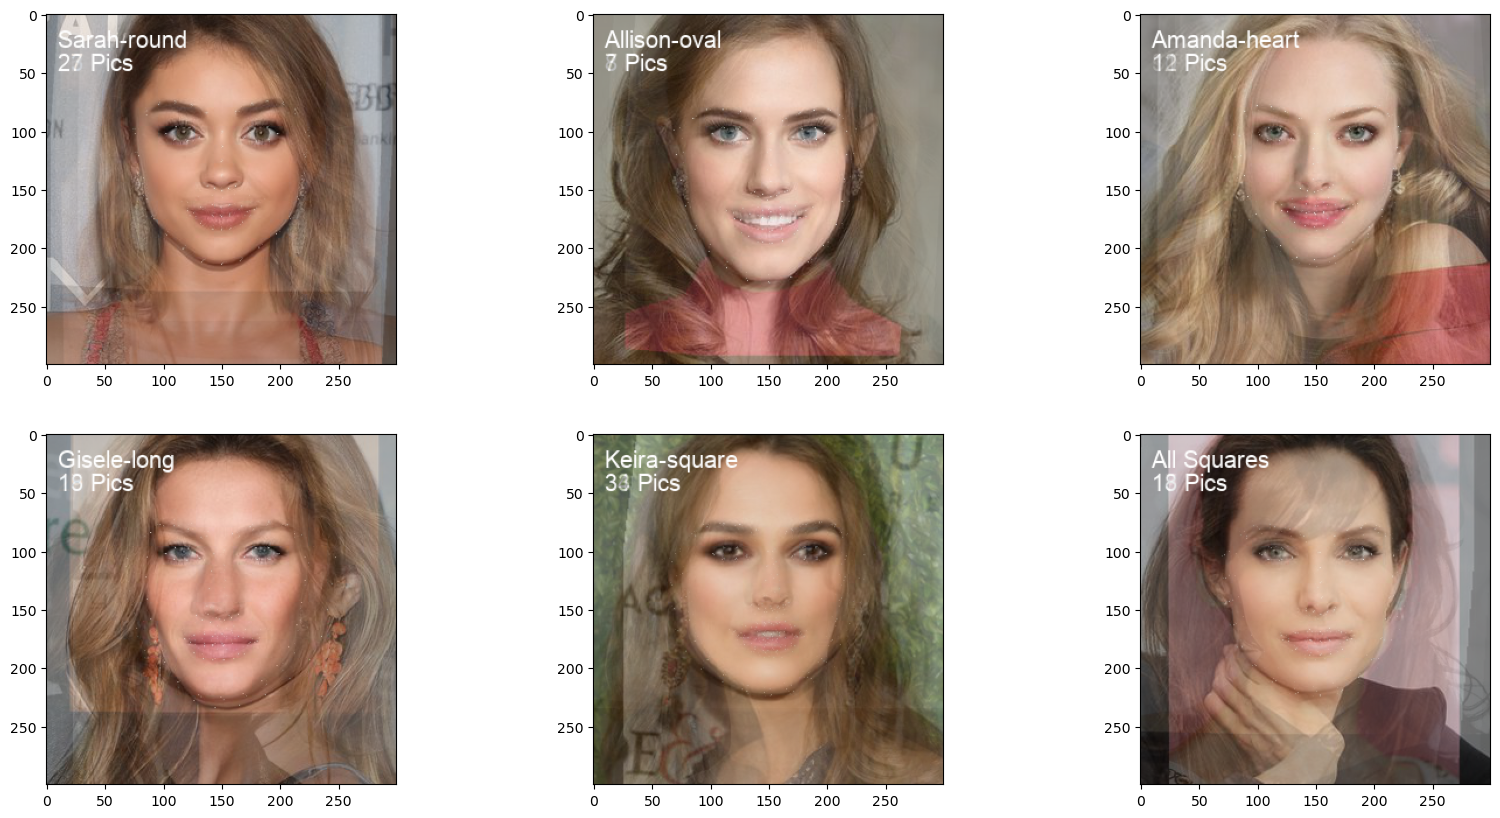

In [17]:
%run -i plot_images.py

## Supervised Learning - the chosen model

### Set up Test/Train for supervised learning

In [18]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import ensemble
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA 

In [19]:
data_clean = data.dropna(axis=0, how='any')
X = data_clean
X = X.drop(['filenum','filename','classified_shape'] , axis = 1)
X_norm = normalize(X)
Y = data_clean['classified_shape']

### Standardize features by removing the mean and scaling to unit variance

In [20]:
scaler = StandardScaler()  
scaler.fit(X)  

X = scaler.transform(X)

### Split into train/test sets

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,
    test_size=0.25,
    random_state=1200)

### Apply PCA for dimension reduction

In [22]:
n_components = 18
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [23]:
# #Remove PCA 
X_train_pca = X_train
X_test_pca = X_test

## Neural Network (MLP)

In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
import itertools

mlp = MLPClassifier(hidden_layer_sizes=(60,10,60,30), solver='sgd',shuffle  = True, 
                    learning_rate_init=0.01, max_iter = 200,warm_start  = False)

from sklearn.model_selection import RandomizedSearchCV 
param_grid = { 
    'learning_rate_init':[0.01]   # always the best
    ,'hidden_layer_sizes': [x for x in itertools.product((10,20,30,40,50,60,100),repeat=4)]
    ,'max_iter': [100] # always the best
    ,'random_state': [525]
}

random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, cv= 5, n_iter = 50)
random_search.fit(X_train_pca, Y_train)
print(random_search.best_estimator_)

MLPClassifier(hidden_layer_sizes=(100, 60, 30, 30), learning_rate_init=0.01,
              max_iter=100, random_state=525, solver='sgd')


In [26]:
# With best model tuning

best_mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 100, 30, 100), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=525,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
best_mlp.fit(X_train_pca, Y_train)

MLPClassifier(hidden_layer_sizes=(60, 100, 30, 100), learning_rate_init=0.01,
              max_iter=100, random_state=525, solver='sgd')

In [27]:
print(best_mlp.score(X_train_pca, Y_train))
mlp_score = best_mlp.score(X_test_pca,Y_test)
print(mlp_score)

1.0
0.6835106382978723


In [28]:
y_pred = best_mlp.predict(X_test_pca)
 
mlp_crosstab = pd.crosstab(Y_test, y_pred, margins=True)
mlp_crosstab

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       heart       0.69      0.65      0.67        75
        long       0.75      0.68      0.71        68
        oval       0.60      0.72      0.65        99
       round       0.71      0.74      0.72        62
      square       0.74      0.62      0.68        72

    accuracy                           0.68       376
   macro avg       0.70      0.68      0.69       376
weighted avg       0.69      0.68      0.68       376



# Run Example:

This section is the implementation of the model itself on a new image.  Select a photo and start the process below.

In [34]:
my_photo = 'data/pics/1.jpg'
file_num = 2035
make_face_df_save(my_photo,file_num,df)

In [35]:
#scaler = StandardScaler()  
dfc = df
test_row = dfc.loc[file_num].values.reshape(1,-1)
test_row = scaler.transform(test_row)  
test_shape = best_mlp.predict(test_row)
print(test_shape)

['oval']


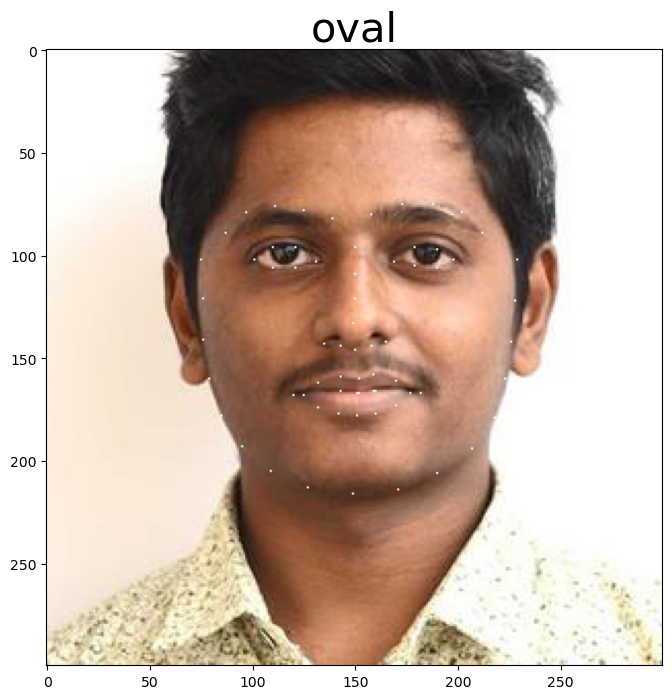

In [36]:
plt.figure(figsize = (8,8))
new_photo = my_photo+'_NEW_rotated_pts.jpg'
img = Image.open(new_photo)
draw = ImageDraw.Draw(img)
plt.title(test_shape[0], fontsize = 30)
plt.imshow(img)
img.close()

In [37]:
dfc.head()

,0,1,2,3,4,5,6,7,8,9,...,A14,A15,A16,Width,Height,H_W_Ratio,Jaw_width,J_F_Ratio,MJ_width,MJ_J_width
2035,75.0,102.0,76.0,121.0,76.0,141.0,79.0,160.0,85.0,178.0,...,46.138177,40.044551,35.059427,154.0,214.009346,1.389671,81.006173,0.526014,133.003759,1.641897


# Recommender

In [55]:
%run -i recommender.py

What is your name? r
Hello, r.
Would you like to see up-dos? (Y/N)r
Updo
oval


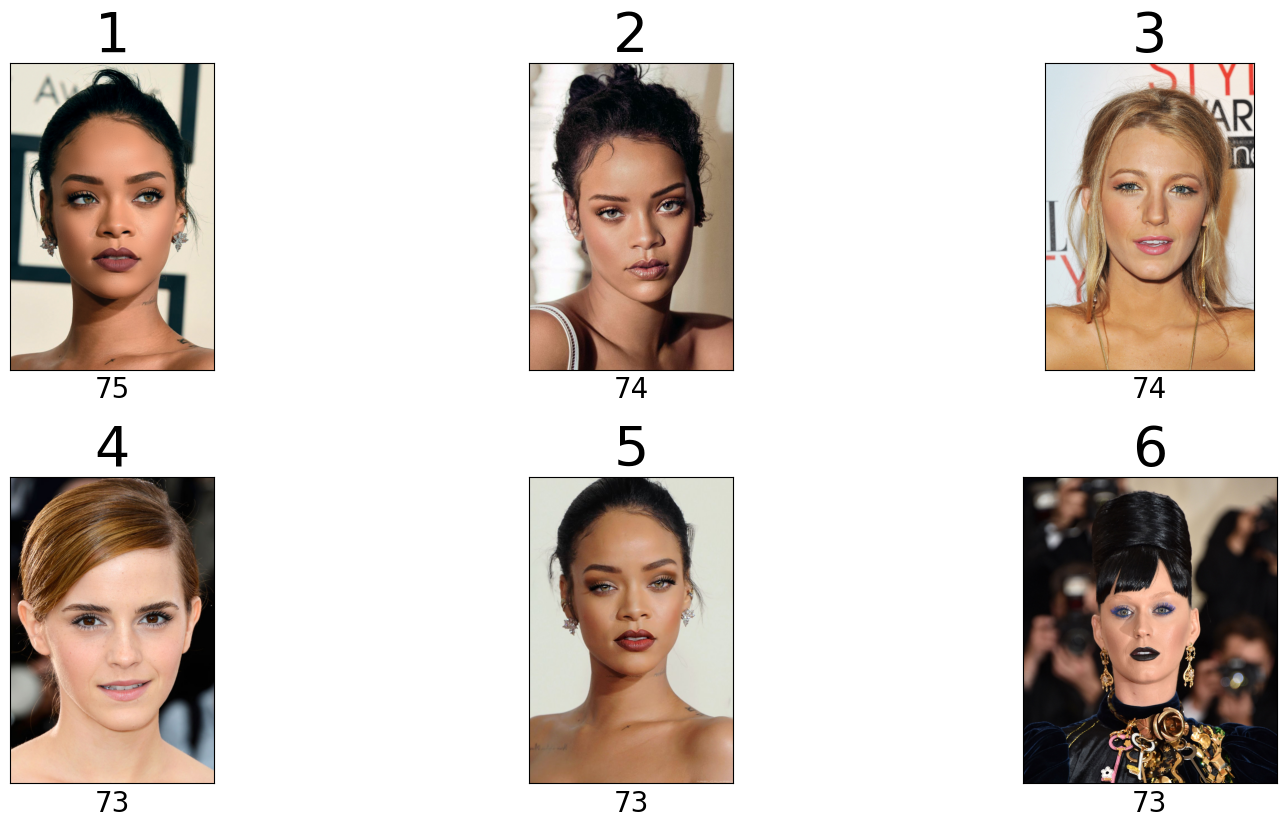

In [ ]:
run_recommender(test_shape[0])